In [1]:
import numpy as np
import os
from plotting import plot_metrics_separately, plot_metrics_together
from utils import get_auc_summary
import pandas as pd
import json

In [2]:
# Get the current directory
current_directory = os.getcwd()

# Define the main directory and subdirectory
main_directory = 'Experiments_log'
sub_directory = '20230801_013220'

# Join these to form the path to the new folder
new_folder_path = os.path.join(current_directory, main_directory, sub_directory)

# Make the new folder if it doesn't already exist
os.makedirs(new_folder_path, exist_ok=True)

# Define the filename
filename = os.path.join(new_folder_path,  'experiment.csv')

# Load the CSV file into a DataFrame
df = pd.read_csv(filename)

# Get the JSON string from the DataFrame
data_str = df['Data'][0]

# Parse the JSON string back to a dictionary
data = json.loads(data_str)

# Extract the values into variables
batch_size = data['batch_size']
min_number_images = data['min_number_images']
balanced = data['balanced']
bag_size = data['bag_size']
aggregation = data['aggregation']
dropout = data['dropout']
class_weight = data['class_weight']
oversamplings = data['oversamplings']
apply_augmentation = data['apply_augmentation']
grayscale = data['grayscale']
train_ratio = data['train_ratio']
test_ratio = data['test_ratio']
lr = data['lr']
epochs = data['epochs']
counts = data['counts']
train_accuracy_list_tracker = data['train_accuracy_list_tracker']
test_accuracy_list_tracker = data['test_accuracy_list_tracker']
test_f1_tracker_list = data['test_f1_tracker_list']
test_roc_auc_tracker_list = data['test_roc_auc_tracker_list']
test_pr_auc_tracker_list = data['test_pr_auc_tracker_list']
test_roc_auc_all_mean = data['test_roc_auc_all_mean']
test_roc_auc_all_std = data['test_roc_auc_all_std']
test_pr_auc_all_mean = data['test_pr_auc_all_mean']
test_pr_auc_all_std = data['test_pr_auc_all_std']
seeds = data['seeds']
cnf_matrices= data['cnf_matrices']

# Convert each list of lists to a numpy array
cnf_matrix_list = [np.array(lists) for lists in cnf_matrices]


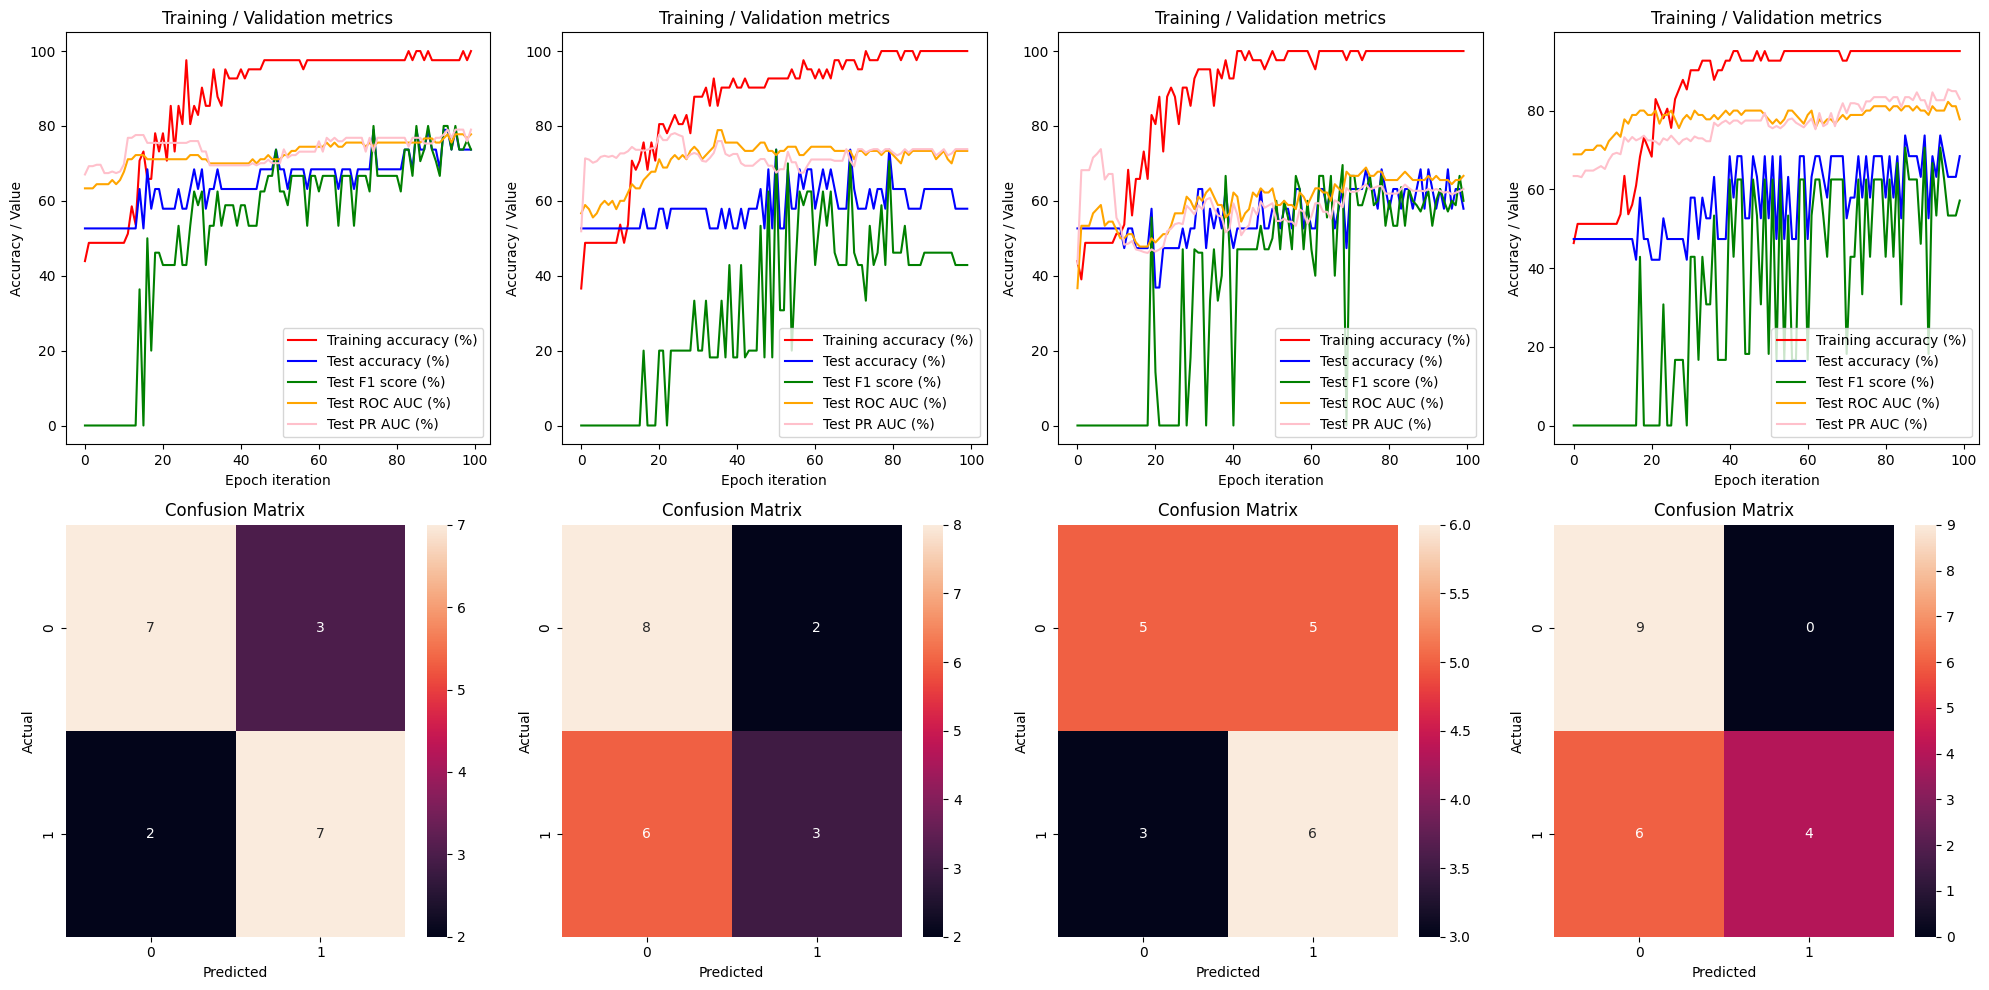

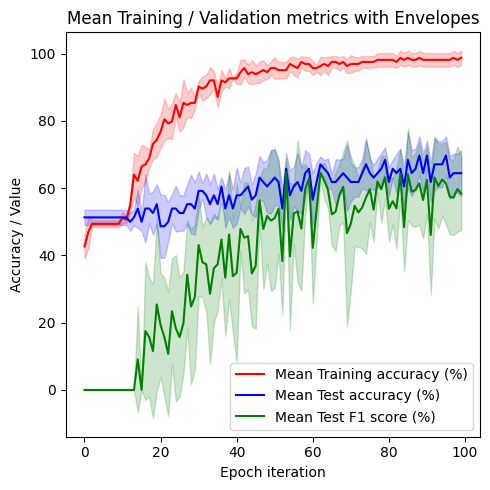

Mean ROC AUC:  73.88888888888889
Std ROC AUC :  4.54741820659581
Mean PR AUC :  74.73895581351722
Std PR AUC  :  7.424465343251006


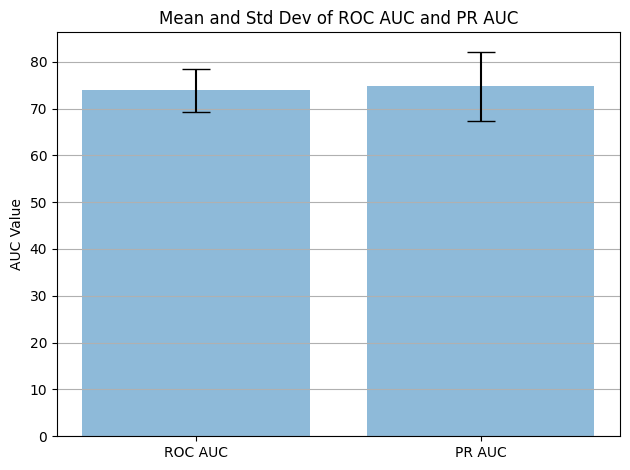

In [3]:
# Plot the output plots

fig_all_metrics = plot_metrics_separately(train_accuracy_list_tracker,test_accuracy_list_tracker,test_f1_tracker_list,test_roc_auc_tracker_list,test_pr_auc_tracker_list, cnf_matrix_list=cnf_matrix_list)
fig_all_together = plot_metrics_together(train_accuracy_list_tracker,test_accuracy_list_tracker,test_f1_tracker_list)

# Handling AUCs:
test_roc_auc_all_mean, test_roc_auc_all_std, test_pr_auc_all_mean, test_pr_auc_all_std, fig_auc = get_auc_summary(test_roc_auc_tracker_list, test_pr_auc_tracker_list, seeds)